
# Home Assignment 1
## Data Science IV, Summer Semester 2021
### Instructor: Johannes Wachs
----
### Instructions 
Answer the following questions with a mixture of code (Python 3) and markdown cells, as appropriate. Your submission should be a Jupyter notebook (.ipynb). Your notebook should run from beginning to end - please test this before you submit. You may use libraries or code written in class, unless specifically noted otherwise.

Submit your solutions via Learn by ***23.59pm on Friday, October 29th 2021***. Late submissions are accepted for 12 hours following the deadline, with 1/3 of the total possible points deducted from the score.

It is ok to borrow code from online sources, if you cite all your sources. Plagiarism will result in an automatic score of 0 points. You may discuss the assignment with your classmates, but everyone should write their own code.

### Please fill in:
Student name: Ema Vargova

WU Student ID: h11914081

----
### Task 1: Write your own bootstrap. (20 Points)
Write a function that:
- takes a list of numbers as input
- calculates their mean
- bootstraps (1000 times) the mean
- returns a list with three elements: the mean, and the lower and upper bounds of the 95\% confidence interval of the bootstrapped mean.

In [25]:
import numpy as np
import pandas as pd

def bootstrap_mean_CI(input_list):
    input_list = pd.DataFrame(input_list)
    bootstrapped_data_means = []
    for i in range(1000):
        bootstrapped_data=input_list.sample(n=len(input_list),replace=True) #taking a sample from the input_list
        bootstrapped_data_means.append(float(np.mean(bootstrapped_data))) #appending mean of the sample to a list
    res = [float(round(np.mean(input_list),4)), #the true mean of the sample
           round(np.percentile(bootstrapped_data_means,2.5),4), #lower bound of the 95% confidence interval
           round(np.percentile(bootstrapped_data_means,97.5),4)] #upper bound of the 95% confidence interval
    return res

bootstrap_mean_CI([1,7,6,7,99,956,5675,3,3456])

[1134.4444, 108.4528, 2525.35]

Write a more general function that takes two inputs:
- a list of numbers
- a function implementing a statistical measure (i.e. the mean, median, variance)
And outputs the statistic and a bootstrapped estimate of the 95% confidence interval. Note: you can pass functions by name as arguments to a function.

In [26]:
def bootstrap_general_CI(input_list, statistical_function):
    bootstrapped_data_stat = []
    input_list = pd.DataFrame(input_list)
    for i in range(1000):
        bootstrapped_data=input_list.sample(n=len(input_list),replace=True) #taking a sample from the input_list
        bootstrapped_data_stat.append(float(statistical_function(bootstrapped_data))) #appending the statistical measure of the sample to a list
    res = [float(round(statistical_function(input_list),4)), #the true statistical measure of the sample
           round(np.percentile(bootstrapped_data_stat,2.5),4), #lower bound of the 95% confidence interval
           round(np.percentile(bootstrapped_data_stat,97.5),4)] #upper bound of the 95% confidence interval
    return res

bootstrap_general_CI([1,7,6,7,99,956,5675,3,3456],np.var)

[3721196.0247, 1535.8099, 6826941.5556]

Draw 1000 samples from a Poisson distribution with mean 10. Apply your general function to calculate the mean and estimate the 95% confidence interval. Repeat for the standard deviation.

In [27]:
poisson_dis = np.random.poisson(10, 1000) #defining samples from a Poission distribution

print(bootstrap_general_CI(poisson_dis,np.mean))
print(bootstrap_general_CI(poisson_dis,np.std))

[9.947, 9.746, 10.1391]
[3.1126, 2.9695, 3.2466]


-----
### Task 2: Finding correlations in random data. (20 Points)
- Generate 100 vectors of 100 numbers each, drawn from a normal distribution with mean 0 and standard deviation 1.
- Calculate the Pearson correlations between all pairs of vectors.
- Plot a histogram of the correlations - be sure to label your axes.
- Select the pair of vectors with the greatest (in absolute value) correlation. Calculate the statistical significance of this correlation, either using a built in library function, or by writing your own.
- Interpret your findings: is the correlation statistically significant? Hint: think of jellybeans. 

(0.37493971482603916, 0.0001213149103617205)


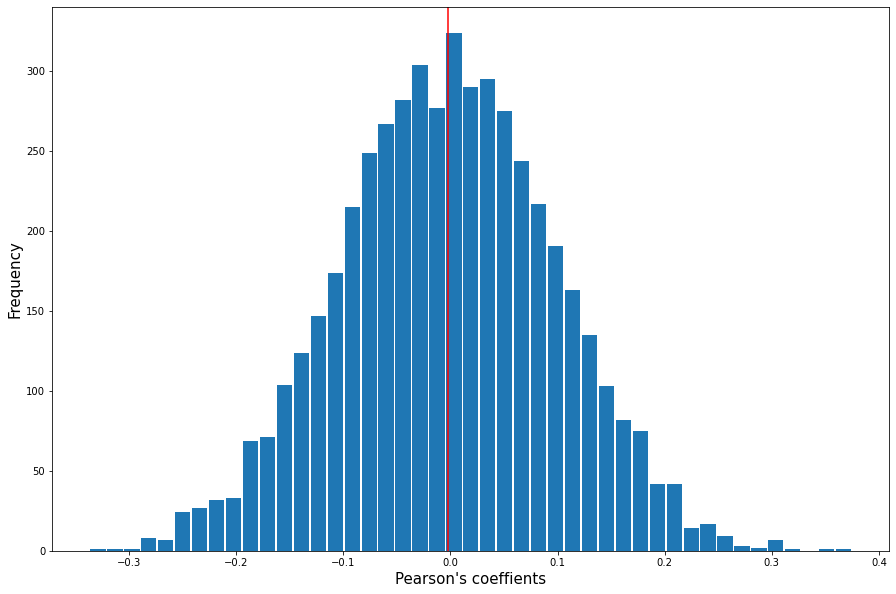

In [28]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

np.random.seed(100)
df = pd.DataFrame()
bootstrapped_correlations = []
log=[[],[],[]]
for i in range(100):
    df[i] = list(np.random.normal(size=100)) #generating a data frame of 100 variables with 100 values each drawn from a nurmal distribution
for i in range(len(df)):
    for j in range(i,len(df)-1):
        r=pearsonr(df[i],df[j+1])[0] #calculating pearson's coeff between all pairs of vectors
        bootstrapped_correlations.append(r)
        log[0].append(abs(r)) #storing the coeff calculates
        log[1].append(i) #storing the index of the first variable used 
        log[2].append(j+1) #storing the index of the second variable used 

plt.figure(figsize=(15,10))
plt.hist(bootstrapped_correlations,bins='auto',rwidth=0.9)
plt.axvline(np.mean(bootstrapped_correlations),color='red')
plt.xlabel("Pearson's coeffients",size=15)
plt.ylabel('Frequency',size=15)

max_index = log[0].index(max(log[0])) #getting the index of the highest pearson's coeff

prep_val_x = log[1][max_index] #getting the index of the first variable used to calculate the highest pearson's coeff
prep_val_y = log[2][max_index] #getting the index of the second variable used to calculate the highest pearson's coeff
cor_max = pearsonr(df[prep_val_x],df[prep_val_y]) #calculating the correlation again between the two variables
print(cor_max)

The strongest linear relationship among the different vectors is given by Pearson's coefficient of 0.3749 with the p-value of 0.0001 meaning that the relationship between the two random variables is significant at 5% singificance level. However, when removing the seed from the simulation, we see that the significance of the model changes quite often which is simply explained by pure chance as we are running 100 simulations with the significance level 5% meaning that 1 in 20 of the p-values in the simulation will result in rejecting the null hypothesis, hence, being significant and the rest failing the significance test the given level alpha of 0.05.

-----
### Task 3: Regex practice (10 Points)
- Using the library re, write a function including a regex that finds the positions of all leading 0s. Example: "I have 023 apples and 0301 oranges and 008 strawberries" has four leading zeros.
- Define a function that finds all dates in a string of the format dd-mm-yyyy OR mm-dd-yyyy. To keep it simple invalid dates (for example 50-50-2004) are ok.

In [29]:
import re
def leading_zeros(input_string):
    pattern = '0[A-Za-z0-9_]+'
    res=re.findall(pattern,input_string)
    for i in range(len(res)):
        res[i] = input_string.index(res[i])
    return res 

leading_zeros("I have 023 apples and 0301 oranges and 008 strawberries")

[7, 22, 39]

In [30]:
def find_all_dates(input_string):
    pattern = '[0-9][0-9]-[0-9][0-9]-[0-9][0-9][0-9][0-9]'
    res=re.findall(pattern,input_string)
    return res 

find_all_dates("hello, 50-0-2004 and 12-12-2012")

['12-12-2012']

-----
### Task 4: Overfitting (20 Points)

- Simulate data generated from a Cosine function on the interval from 0 to 4. Do this by:
1. randomly drawing 1000 values from the interval from 0 to 4
2. evaluating the cosine of each value and adding a bit of noise (a value drawn from a normal distribution with mean 0 and standard deviation .1).
- Plot the resulting simulated data.
- Carry out a test-train split of the data.
- Fit polynomial regression models of degree 1 (i.e. a linear model), 2 (quadratic), 3 (cubic), up to degree 10 to the training data. Report the root mean squared error (RMSE) of each model on the held out test data.
- Interpret: which model would you use to generalize?

In [31]:
import random as ran
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(50)
res=pd.DataFrame({'Degree of regression model':[],'RMSE':[]})
df=pd.DataFrame({'X':[],'Y':[]})
df['X']=np.random.uniform(0, 4, 1000) #generating random numbers
noise = np.random.normal(0,0.1,size=1000) #generating noice values
df['Y']=np.cos(df['X'])+noise #generating response variables

#test-train split of the data
X_train, X_test, y_train, y_test = train_test_split(df['X'], df['Y'], test_size=.5, random_state=20)

for i in range(10):
    model = np.poly1d(np.polyfit(X_train, y_train, i+1)) #training the polynomial regression model
    y_pred = model(X_test) #predicting y values
    MSE = mean_squared_error(y_test, y_pred) #getting the mean squared error valuw for the model
    RMSE = np.sqrt(MSE)  #getting the root mean squared error valuw for the model
    res.loc[len(res.index)] = [int(i+1),RMSE] #storing the degree and RMSE of the model in a dataframe 
display(res)

,Degree of regression model,RMSE
0,1.0,0.260106
1,2.0,0.177774
2,3.0,0.101953
3,4.0,0.100650
4,5.0,0.101471
5,6.0,0.101432
6,7.0,0.101634
7,8.0,0.101787
8,9.0,0.102318
9,10.0,0.102351


Best performing model:

In [32]:
best_degree=int(res[res.RMSE == res.RMSE.min()]['Degree of regression model']) #getting the degree of min RMSE model
display(res[res.RMSE == res.RMSE.min()])

,Degree of regression model,RMSE
3,4.0,0.10065


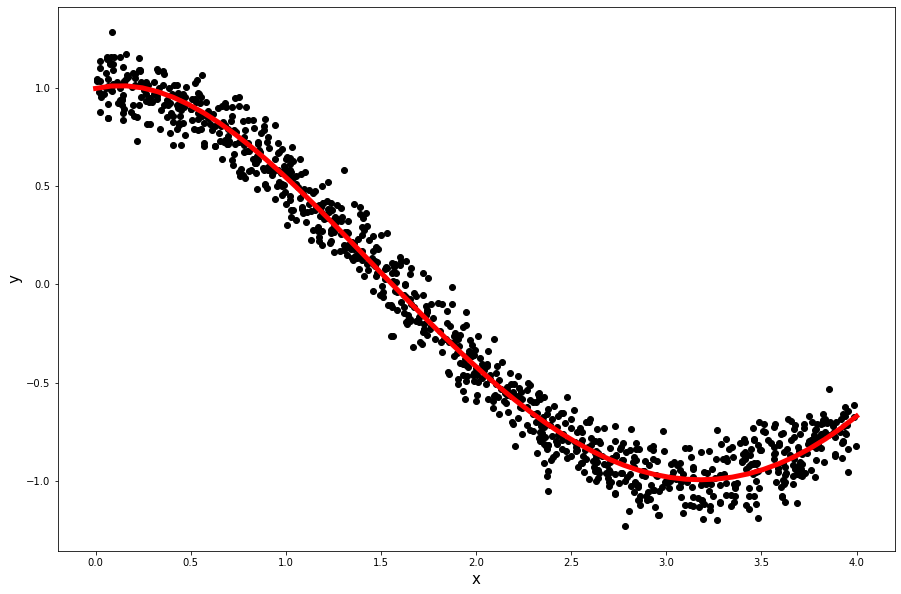

In [33]:
best_fit_model=np.poly1d(np.polyfit(X_train, y_train, best_degree)) #training the best polynomial model again

plt.figure(figsize=(15,10))
plt.scatter(df['X'],df['Y'],color='black')
plt.xlabel("x",size=15)
plt.ylabel('y',size=15)

myline = np.linspace(0,4)
plt.plot(myline, best_fit_model(myline), color="red", lw=5) #plotting the best model

The best model fit which minimize the root mean squared error (RMSE) is the polynomial model of the fourth degree for which the RMSE value is 0.101 which is the lowest achieved out of all polynomial models fitted.

-----
### Task 5: Python or Java? (30 Points)
Stack Overflow is a platform for people to ask and answer questions about computer programming. The site uses a system of tags to label posts. These tags help users search for questions. Often users do not tag their posts but NLP can help. 

In this task, your goal will be to train a machine learning classifier to distinguish between questions tagged *python* and *java* using the text of the question. The resulting classifier represents a first step towards a system that can automatically categorize new incoming posts.

I have provided you with a random sample of 1000 posts tagged python and 1000 posts tagged java. Note that none of the posts in your sample have been tagged with both python and java. To make the task more challenging, I have removed the substrings python, java, and py from the questions.

This task will require several steps. Feel free to adapt code from the in-class demonstration.

Steps:
- Read in the file python_or_java.csv
- Process the text as discussed during the class.
- Create a document-term matrix, weighted via TD-IDF.
- Carry out a test-train split or cross-validation procedure
- Train a classifier to distinguish Python from Java posts on training data.
- Evaluate the performance of your classifier on held out data. You should report at least two evaluation statistics. What is the baseline accuracy of a classifier that always guesses Python?
- What text features are most suggestive of a Python post? A Java post?

1) Getting all the libraries and defining the data processing pipeline:

In [34]:
#libraries for the data processing pipeline
import string
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

#libraries for training the model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

lemmatizer = WordNetLemmatizer()
ps = PorterStemmer() 
en_stopwords= stopwords.words('english')

def get_wordnet_pos(token):
    """Helper function: map POS tag to first character lemmatize() accepts
    Taken from: https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
    """
    tag = nltk.pos_tag([token])[0][1][0].upper() #extract the information
    tag_dict = {"J": wordnet.ADJ, #map
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN) #guess noun if unknown


def processing_pipeline(text):
    '''takes a sentence and returns a lowercased, lemmatized, and stemmed list of tokens'''
    tokens=nltk.word_tokenize(text)
    lemmatized_tokens=[lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    stemmed_tokens =[ps.stem(token) for token in lemmatized_tokens]
    processed_tokens = [token for token in stemmed_tokens if token not in en_stopwords] #removing stopwords/common words
    processed_tokens = [token for token in processed_tokens if token not in string.punctuation] #removing punctiuation
    return processed_tokens

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2) Reading in th data and using the data processing pipeline to process the body of the Stack Overflow posts:

In [35]:
df=pd.read_csv('python_or_java.csv')
df['processed_body']=df['Body'].map(processing_pipeline)

corpus= list([' '.join(text) for text in df['processed_body']])
vectorizer = TfidfVectorizer(min_df=10, max_df=.5) 
#keep only those tokens in at least 10 document, and in at most 50% of documents

DTM=vectorizer.fit_transform(corpus)
y = np.array(df.python_post) 

The response variable is the indicator of whether a post is a python post: 1 - python, 0 - java

3) Test-train split of the data and training a logistic regression classifier on the training data:

In [36]:
X_train, X_test, y_train, y_test = train_test_split(DTM, y, test_size=.5, random_state=42)

reg = LogisticRegression(penalty='l1',solver='saga',C=10)
reg.fit(X_train, y_train)
y_pred = reg.predict_proba(X_test)[:,1]

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


4) Calculating the accuracy score and area under the curve score (AUC) in order to see how well the model perform when compared to the baseline of 0.5 which is the accuracy of always predicting that a post is a python post:

Baseline Accuracy if we always guess irrelevant: .5
Accuracy: 0.901
----------------
Confusion Matrix:
[[449  44]
 [ 55 452]]
----------------
AUC Score: 0.965


Text(0, 0.5, 'True Positive Rate')

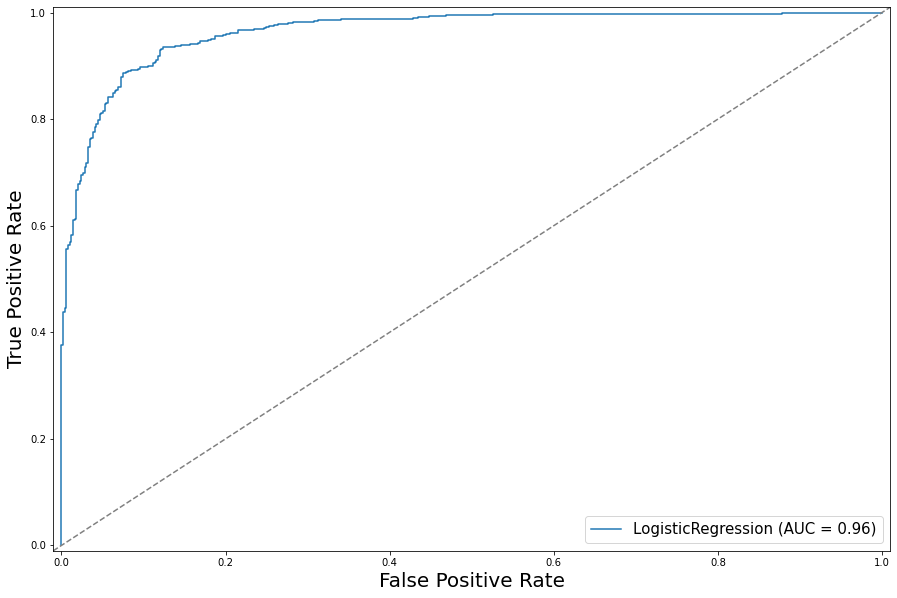

In [37]:
print('Baseline Accuracy if we always guess irrelevant: .5')
print('Accuracy: ' + str(round(accuracy_score(y_test, reg.predict(X_test)),3)))
print('----------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test, reg.predict(X_test)))
print('----------------')
print('AUC Score: '+str(round(roc_auc_score(y_test,y_pred),3)))


f,ax=plt.subplots(1,figsize=(15,10))
plot_roc_curve(reg, X_test, y_test,ax=ax)
ax.plot([0, 1], [0, 1], transform=ax.transAxes,color='grey',linestyle='--')
plt.xlim([-.01,1.01])
plt.ylim([-.01,1.01])
plt.legend(prop={"size":15})
plt.xlabel('False Positive Rate',size=20)
plt.ylabel('True Positive Rate',size=20)

The model performs much better than the baseline accuracy with an accuracy score of approximately 90% which means that the model classifies 90% of the posts correctly. The remaining 10% are false positives and false negative - see the confusion matrix. Moreover, the AUC measure is quite high as well which tells us that a randomly selected python post has a much higher probability of being a python post with the logistic regression model than a randomly selected java post.

5) Getting the top 10 features of python and java posts:

In [38]:
top_positive_coefficients = pd.Series(reg.coef_[0]).sort_values(ascending=False).head(10)
top_negative_coefficients = pd.Series(reg.coef_[0]).sort_values(ascending=False).tail(10)

Top suggestive features of Python:

In [39]:
for x in top_positive_coefficients.index:
    print(vectorizer.get_feature_names()[x])

python
def
self
modul
print
django
function
re
model
element


Top suggestive features of Java:

In [40]:
for x in top_negative_coefficients.index:
    print(vectorizer.get_feature_names()[x])

int
void
kindli
netbean
eclips
privat
android
public
new
java
